In [1]:

import acquire
import prep

# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

### Database Info

The U.S. Energy Information Administration is committed to enhancing the value of its free and open data by making it available through an Application Programming Interface (API) and open data tools to better serve our customers. The data in the API is also available in bulk file, in Excel via the add-in, in Google Sheets via an add-on, and via widgets that embed interactive data vizualizations of EIA data on any website. By making EIA data available in machine-readable formats, the creativity in the private, the non-profit, and the public sectors can be harnessed to find new ways to innovate and create value-added services powered by public data.



Currently, EIA's API contains the following main data sets:

Hourly electricity operating data, including actual and forecast demand, net generation, and the power flowing between electric systems
408,000 electricity series organized into 29,000 categories
30,000 State Energy Data System series organized into 600 categories
115,052 petroleum series and associated categories
34,790 U.S. crude imports series and associated categories
11,989 natural gas series and associated categories
132,331 coal series and associated categories
3,872 Short-Term Energy Outlook series and associated categories
368,466 Annual Energy Outlook series and associated categories
92,836 International energy series

In [2]:
# call function to view the api keys
data = acquire.epi_category('711238')
data.keys()

dict_keys(['request', 'category'])

In [3]:
# convert to dataframe to view data i would like to view
df_series = pd.DataFrame(data['category']['childseries'])
df_series
# select only the f rows that have 'A'
df_series[df_series['f'] == 'A']

,series_id,name,f,units,updated
0,TOTAL.FFPRBUS.A,"Total Fossil Fuels Production, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
2,TOTAL.FFTCBUS.A,"Total Fossil Fuels Consumption, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
4,TOTAL.NUETBUS.A,"Nuclear Electric Power Consumption/Production,...",A,Trillion Btu,24-MAR-22 03.37.10 PM
6,TOTAL.REPRBUS.A,"Total Renewable Energy Production, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
8,TOTAL.RETCBUS.A,"Total Renewable Energy Consumption, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
10,TOTAL.TEAJBUS.A,"Primary Energy Stock Change and Other, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
12,TOTAL.TEEXBUS.A,"Total Primary Energy Exports, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
14,TOTAL.TEIMBUS.A,"Total Primary Energy Imports, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
16,TOTAL.TENIBUS.A,"Total Primary Energy Net Imports, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
18,TOTAL.TEPRBUS.A,"Total Primary Energy Production, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM


In [4]:
# create a list of the series_id's and names where the f is A
series_id = []
series_name = []
for i in range(len(df_series)):
    if df_series['f'][i] == 'M':
        series_id.append(df_series['series_id'][i])
        series_name.append(df_series['name'][i])
print(series_id)
print(series_name)

['TOTAL.FFPRBUS.M', 'TOTAL.FFTCBUS.M', 'TOTAL.NUETBUS.M', 'TOTAL.REPRBUS.M', 'TOTAL.RETCBUS.M', 'TOTAL.TEAJBUS.M', 'TOTAL.TEEXBUS.M', 'TOTAL.TEIMBUS.M', 'TOTAL.TENIBUS.M', 'TOTAL.TEPRBUS.M', 'TOTAL.TETCBUS.M']
['Total Fossil Fuels Production, Monthly', 'Total Fossil Fuels Consumption, Monthly', 'Nuclear Electric Power Consumption/Production, Monthly', 'Total Renewable Energy Production, Monthly', 'Total Renewable Energy Consumption, Monthly', 'Primary Energy Stock Change and Other, Monthly', 'Total Primary Energy Exports, Monthly', 'Total Primary Energy Imports, Monthly', 'Total Primary Energy Net Imports, Monthly', 'Total Primary Energy Production, Monthly', 'Total Primary Energy Consumption, Monthly']


In [5]:
# call function to build the working dataframe
df_list = acquire.build_df_list_rename(series_id, series_name)

In [6]:
# convert df_list to a dataframe and join lists on the date
df_list = pd.concat(df_list, axis=1)

In [7]:
df_list.sort_index(inplace=True)
df_list

,"Total Fossil Fuels Production, Monthly","Total Fossil Fuels Consumption, Monthly","Nuclear Electric Power Consumption/Production, Monthly","Total Renewable Energy Production, Monthly","Total Renewable Energy Consumption, Monthly","Primary Energy Stock Change and Other, Monthly","Total Primary Energy Exports, Monthly","Total Primary Energy Imports, Monthly","Total Primary Energy Net Imports, Monthly","Total Primary Energy Production, Monthly","Total Primary Energy Consumption, Monthly"
date,,,,,,,,,,,
197301,4932.632,6747.651,68.103,403.981,403.981,771.858,125.781,1173.080,1047.299,5404.715,7223.873
197302,4729.582,6163.095,64.634,360.900,360.900,390.129,120.883,1168.005,1047.122,5155.115,6592.366
197303,4946.902,6044.647,72.494,400.161,400.161,-67.640,139.950,1309.473,1169.523,5419.556,6521.439
197304,4716.271,5493.184,64.070,380.470,380.470,-110.067,194.185,1085.169,890.984,5160.812,5941.729
197305,4956.995,5613.551,62.111,392.141,392.141,-305.335,196.775,1162.804,966.029,5411.246,6071.940
...,...,...,...,...,...,...,...,...,...,...,...
202108,6627.111,6746.391,725.698,1008.059,1001.833,481.333,2201.484,1844.726,-356.758,8360.867,8485.442
202109,6355.365,6062.810,673.595,970.036,960.758,-188.842,1931.406,1827.781,-103.625,7998.996,7706.530
202110,6722.335,6072.363,594.842,1010.785,1001.577,-267.817,2130.359,1748.724,-381.635,8327.963,7678.511


In [8]:
df = prep.prepare_data(df_list)

In [9]:
df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,nuclear_electric_power_consumptionproduction_monthly,total_renewable_energy_production_monthly,total_renewable_energy_consumption_monthly,primary_energy_stock_change_and_other_monthly,total_primary_energy_exports_monthly,total_primary_energy_imports_monthly,total_primary_energy_net_imports_monthly,total_primary_energy_production_monthly,total_primary_energy_consumption_monthly
date,,,,,,,,,,,
1973-01-01,4932.632,6747.651,68.103,403.981,403.981,771.858,125.781,1173.080,1047.299,5404.715,7223.873
1973-02-01,4729.582,6163.095,64.634,360.900,360.900,390.129,120.883,1168.005,1047.122,5155.115,6592.366
1973-03-01,4946.902,6044.647,72.494,400.161,400.161,-67.640,139.950,1309.473,1169.523,5419.556,6521.439
1973-04-01,4716.271,5493.184,64.070,380.470,380.470,-110.067,194.185,1085.169,890.984,5160.812,5941.729
1973-05-01,4956.995,5613.551,62.111,392.141,392.141,-305.335,196.775,1162.804,966.029,5411.246,6071.940
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,6627.111,6746.391,725.698,1008.059,1001.833,481.333,2201.484,1844.726,-356.758,8360.867,8485.442
2021-09-01,6355.365,6062.810,673.595,970.036,960.758,-188.842,1931.406,1827.781,-103.625,7998.996,7706.530
2021-10-01,6722.335,6072.363,594.842,1010.785,1001.577,-267.817,2130.359,1748.724,-381.635,8327.963,7678.511


In [180]:
# feature engineering 
# create a new column that is the difference between the total_fossil_fuels_production_monthly and otal_fossil_fuels_consumption_monthly
df['fossil_fuels_difference'] = df['total_fossil_fuels_production_monthly'] - df['total_fossil_fuels_consumption_monthly']


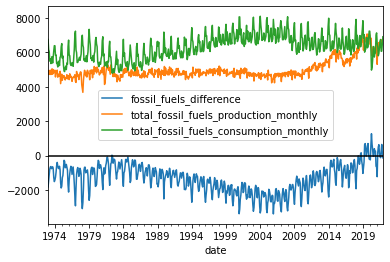

In [11]:
# plot fossil fuels difference
import matplotlib.pyplot as plt
df['fossil_fuels_difference'].plot()
df['total_fossil_fuels_production_monthly'].plot()
df['total_fossil_fuels_consumption_monthly'].plot()
# place a line at 0 
plt.axhline(y=0, color='black')
plt.legend()

In [181]:
# create a new column that is the difference between the total_primary_energy_imports_monthly and total_primary_energy_net_imports_monthly
df['primary_energy_difference'] = df['total_primary_energy_imports_monthly'] - df['total_primary_energy_exports_monthly']


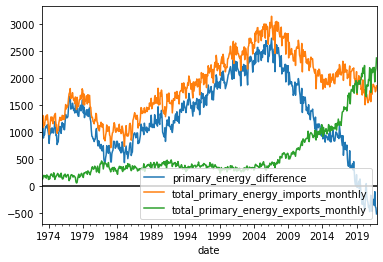

In [13]:
# plot primary energy difference
df['primary_energy_difference'].plot()
df['total_primary_energy_imports_monthly'].plot()
df['total_primary_energy_exports_monthly'].plot()
# place a line at 0
plt.axhline(y=0, color='black')
# legend
plt.legend()

In [182]:
# create a new column with the differance between total_primary_energy_production_monthly and total_primary_energy_consumption_monthly	
df['primary_energy_difference'] = df['total_primary_energy_production_monthly'] - df['total_primary_energy_consumption_monthly']


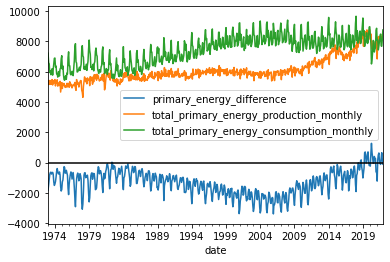

In [15]:
# plot primary energy difference
df['primary_energy_difference'].plot()
df['total_primary_energy_production_monthly'].plot()
df['total_primary_energy_consumption_monthly'].plot()
# place a line at 0
plt.axhline(y=0, color='black')
# legend
plt.legend()

In [16]:
# create a new column with the differance between total_fossil_fuels_consumption_monthly and total_primary_energy_consumption_monthly
df['total_fossil_fuel_difference'] = df['total_fossil_fuels_consumption_monthly'] - df['total_primary_energy_consumption_monthly']
df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,nuclear_electric_power_consumptionproduction_monthly,total_renewable_energy_production_monthly,total_renewable_energy_consumption_monthly,primary_energy_stock_change_and_other_monthly,total_primary_energy_exports_monthly,total_primary_energy_imports_monthly,total_primary_energy_net_imports_monthly,total_primary_energy_production_monthly,total_primary_energy_consumption_monthly,fossil_fuels_difference,primary_energy_difference,total_fossil_fuel_difference
date,,,,,,,,,,,,,,
1973-01-01,4932.632,6747.651,68.103,403.981,403.981,771.858,125.781,1173.080,1047.299,5404.715,7223.873,-1815.019,-1819.158,-476.222
1973-02-01,4729.582,6163.095,64.634,360.900,360.900,390.129,120.883,1168.005,1047.122,5155.115,6592.366,-1433.513,-1437.251,-429.271
1973-03-01,4946.902,6044.647,72.494,400.161,400.161,-67.640,139.950,1309.473,1169.523,5419.556,6521.439,-1097.745,-1101.883,-476.792
1973-04-01,4716.271,5493.184,64.070,380.470,380.470,-110.067,194.185,1085.169,890.984,5160.812,5941.729,-776.913,-780.917,-448.545
1973-05-01,4956.995,5613.551,62.111,392.141,392.141,-305.335,196.775,1162.804,966.029,5411.246,6071.940,-656.556,-660.694,-458.389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,6627.111,6746.391,725.698,1008.059,1001.833,481.333,2201.484,1844.726,-356.758,8360.867,8485.442,-119.280,-124.575,-1739.051
2021-09-01,6355.365,6062.810,673.595,970.036,960.758,-188.842,1931.406,1827.781,-103.625,7998.996,7706.530,292.555,292.466,-1643.720
2021-10-01,6722.335,6072.363,594.842,1010.785,1001.577,-267.817,2130.359,1748.724,-381.635,8327.963,7678.511,649.972,649.452,-1606.148


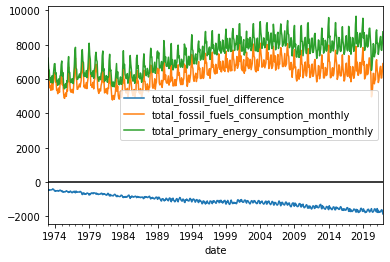

In [17]:
# plot total energy difference
df['total_fossil_fuel_difference'].plot()
df['total_fossil_fuels_consumption_monthly'].plot()
df['total_primary_energy_consumption_monthly'].plot()
# place a line at 0
plt.axhline(y=0, color='black')
# legend
plt.legend()

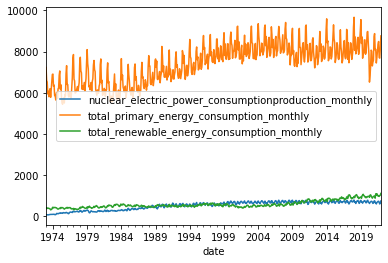

In [18]:
df['nuclear_electric_power_consumptionproduction_monthly'].plot()
df['total_primary_energy_consumption_monthly'].plot()
df['total_renewable_energy_consumption_monthly'].plot()
plt.legend()

Exploration

In [19]:
# create a new dataframe with the fossil fuels
df_fossil_fuels = df[['total_fossil_fuels_production_monthly', 'total_fossil_fuels_consumption_monthly', 'fossil_fuels_difference']]
df_fossil_fuels

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1973-01-01,4932.632,6747.651,-1815.019
1973-02-01,4729.582,6163.095,-1433.513
1973-03-01,4946.902,6044.647,-1097.745
1973-04-01,4716.271,5493.184,-776.913
1973-05-01,4956.995,5613.551,-656.556
...,...,...,...
2021-08-01,6627.111,6746.391,-119.280
2021-09-01,6355.365,6062.810,292.555
2021-10-01,6722.335,6072.363,649.972


In [20]:
int(len(df_fossil_fuels) * 0.5)

294

In [21]:
# set train size to be 50% of total 
train_size = int(len(df_fossil_fuels) * 0.5)
train_size

294

In [22]:
# set validate size to be 30% of total 
validate_size = int(len(df_fossil_fuels) * 0.3)
validate_size

176

In [23]:
# set test size to be number of rows remaining. 
test_size = int(len(df_fossil_fuels) - train_size - validate_size)
test_size

118

In [24]:
len(df_fossil_fuels) == train_size + validate_size + test_size

True

In [25]:
validate_end_index = train_size + validate_size
validate_end_index

470

In [26]:
# train will go from 0 to 911
train = df_fossil_fuels[:train_size]

In [27]:
# validate will go from 912 to 1458
validate = df_fossil_fuels[train_size:validate_end_index]

In [28]:
validate

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1997-07-01,4901.194,6864.248,-1963.054
1997-08-01,4899.501,6688.172,-1788.671
1997-09-01,4906.809,6338.503,-1431.694
1997-10-01,5046.643,6594.252,-1547.609
1997-11-01,4699.572,6676.918,-1977.346
...,...,...,...
2011-10-01,5299.419,6182.237,-882.818
2011-11-01,5235.448,6355.753,-1120.305
2011-12-01,5347.022,7034.714,-1687.692


In [29]:
# test will include 1459 to the end
test = df_fossil_fuels[validate_end_index:]

In [30]:
train.size, validate.size, test.size

(882, 528, 354)

In [31]:
train

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1973-01-01,4932.632,6747.651,-1815.019
1973-02-01,4729.582,6163.095,-1433.513
1973-03-01,4946.902,6044.647,-1097.745
1973-04-01,4716.271,5493.184,-776.913
1973-05-01,4956.995,5613.551,-656.556
...,...,...,...
1997-02-01,4651.357,6685.037,-2033.680
1997-03-01,5034.904,6818.842,-1783.938
1997-04-01,4810.734,6438.344,-1627.610


In [32]:
# is len of train + validate + test == lenght of entire dataframe. 
len(train) + len(validate) + len(test) == len(df_fossil_fuels)

True

In [33]:
print(df_fossil_fuels.head(1) == train.head(1))

            total_fossil_fuels_production_monthly  \
date                                                
1973-01-01                                   True   

            total_fossil_fuels_consumption_monthly  fossil_fuels_difference  
date                                                                         
1973-01-01                                    True                     True  


In [34]:
pd.concat([train.tail(1), validate.head(1)])

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1997-06-01,4753.058,6301.964,-1548.906
1997-07-01,4901.194,6864.248,-1963.054


In [35]:
pd.concat([validate.tail(1), test.head(1)])

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2012-02-01,4973.297,6591.734,-1618.437
2012-03-01,5210.409,6215.814,-1005.405


In [36]:
train.columns

Index(['total_fossil_fuels_production_monthly',
       'total_fossil_fuels_consumption_monthly', 'fossil_fuels_difference'],
      dtype='object')

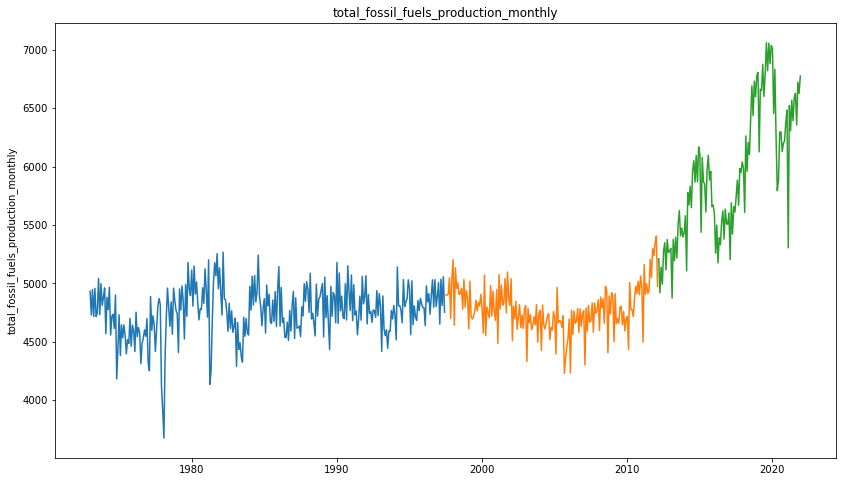

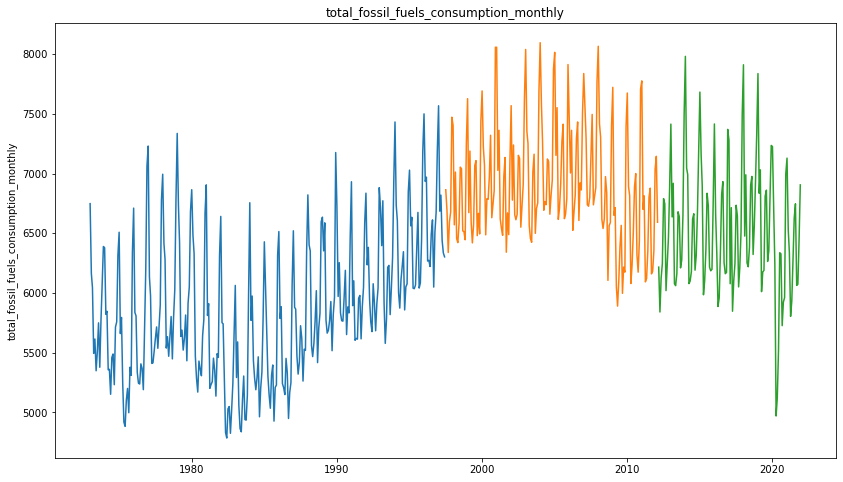

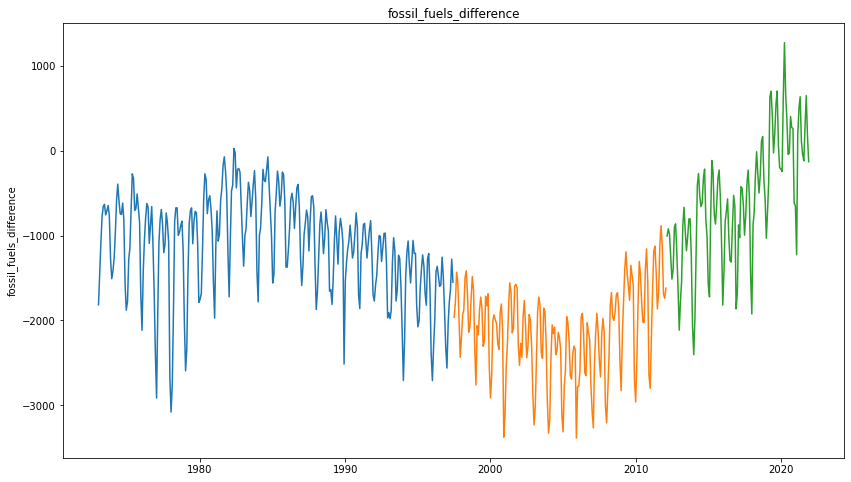

In [37]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [38]:


def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [39]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [40]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [41]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [42]:
train['total_fossil_fuels_consumption_monthly'][-1:][0]

6301.964

In [43]:
# take the last item of dollars sold and assign to variable
consumption = train['total_fossil_fuels_consumption_monthly'][-1:][0]
consumption

6301.964

In [44]:
production = train['total_fossil_fuels_production_monthly'][-1:][0]
production

4753.058

In [45]:
difference = train['fossil_fuels_difference'][-1:][0]

In [46]:
yhat_df = pd.DataFrame(
    {'total_fossil_fuels_consumption_monthly': [consumption],
     'total_fossil_fuels_production_monthly': [production],
     'fossil_fuels_difference': [difference]},
    index=validate.index)

yhat_df.head()

,total_fossil_fuels_consumption_monthly,total_fossil_fuels_production_monthly,fossil_fuels_difference
date,,,
1997-07-01,6301.964,4753.058,-1548.906
1997-08-01,6301.964,4753.058,-1548.906
1997-09-01,6301.964,4753.058,-1548.906
1997-10-01,6301.964,4753.058,-1548.906
1997-11-01,6301.964,4753.058,-1548.906


In [47]:
yhat_df.describe()

,total_fossil_fuels_consumption_monthly,total_fossil_fuels_production_monthly,fossil_fuels_difference
count,1.760000e+02,1.760000e+02,1.760000e+02
mean,6.301964e+03,4.753058e+03,-1.548906e+03
std,8.208806e-12,1.003299e-11,4.332425e-12
min,6.301964e+03,4.753058e+03,-1.548906e+03
25%,6.301964e+03,4.753058e+03,-1.548906e+03
50%,6.301964e+03,4.753058e+03,-1.548906e+03
75%,6.301964e+03,4.753058e+03,-1.548906e+03
max,6.301964e+03,4.753058e+03,-1.548906e+03


You can see, when peeking into yhat_df, that every predicted value is the same.  

**Plot Actual vs. Predicted Values**

Now, let's plot actual and predicted values

total_fossil_fuels_consumption_monthly -- RMSE: 774


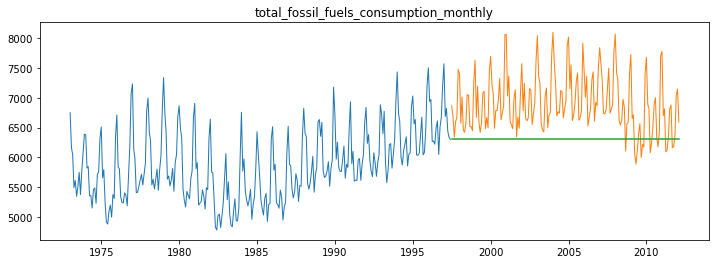

In [48]:
plot_and_eval('total_fossil_fuels_consumption_monthly')

total_fossil_fuels_production_monthly -- RMSE: 201


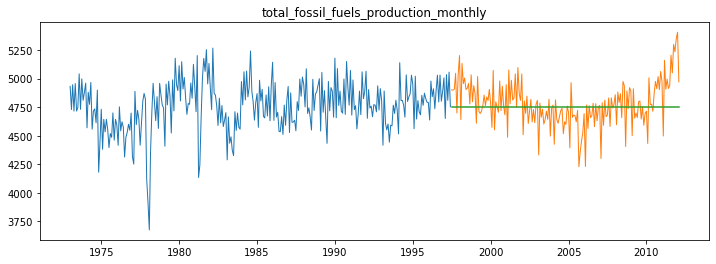

total_fossil_fuels_consumption_monthly -- RMSE: 774


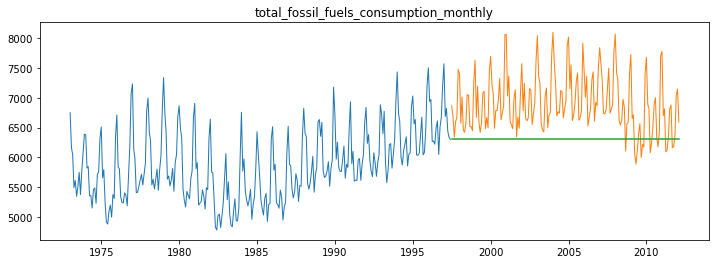

fossil_fuels_difference -- RMSE: 776


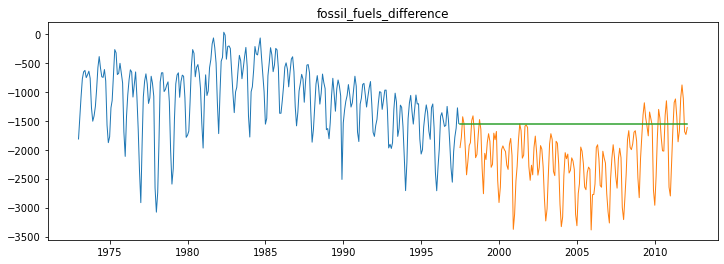

In [49]:
for col in train.columns:
    plot_and_eval(col)

In [50]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

eval_df

,model_type,target_var,rmse
0,last_observed_value,total_fossil_fuels_production_monthly,201.0
1,last_observed_value,total_fossil_fuels_consumption_monthly,774.0
2,last_observed_value,fossil_fuels_difference,776.0


### Simple Average

Take the simple average of historical values and use that value to predict future values.   

This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assigned the same value, and that value will be the overall mean of the values in train. 

**Make Predictions**

Dollars: establishing the value of the prediction we will make

In [51]:
# compute simple average
production = round(train['total_fossil_fuels_production_monthly'].mean(), 2)
production

4759.71

In [52]:
consumption = round(train['total_fossil_fuels_consumption_monthly'].mean(), 2)
consumption

5880.91

In [53]:
difference = round(train['fossil_fuels_difference'].mean(), 2)
difference

-1121.19

In [54]:
def make_predictions(production=None, consumption=None, difference=None):
    yhat_df = pd.DataFrame({'total_fossil_fuels_production_monthly': [production],
                           'total_fossil_fuels_consumption_monthly': [consumption],
                           'fossil_fuels_difference': [difference]},
                           index=validate.index)
    return yhat_df

In [55]:
yhat_df = make_predictions(production, consumption, difference)

In [56]:
yhat_df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1997-07-01,4759.71,5880.91,-1121.19
1997-08-01,4759.71,5880.91,-1121.19
1997-09-01,4759.71,5880.91,-1121.19
1997-10-01,4759.71,5880.91,-1121.19
1997-11-01,4759.71,5880.91,-1121.19


In [57]:
yhat_df.describe()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
count,1.760000e+02,1.760000e+02,1.760000e+02
mean,4.759710e+03,5.880910e+03,-1.121190e+03
std,8.208806e-12,1.003299e-11,1.824179e-12
min,4.759710e+03,5.880910e+03,-1.121190e+03
25%,4.759710e+03,5.880910e+03,-1.121190e+03
50%,4.759710e+03,5.880910e+03,-1.121190e+03
75%,4.759710e+03,5.880910e+03,-1.121190e+03
max,4.759710e+03,5.880910e+03,-1.121190e+03


**Plot Actual vs. Predicted Values**

Now, let's plot and evaluate the performance of our time series model using **Simple Average**

total_fossil_fuels_production_monthly -- RMSE: 200


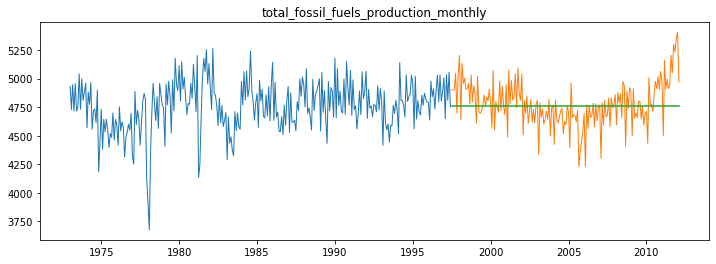

total_fossil_fuels_consumption_monthly -- RMSE: 1134


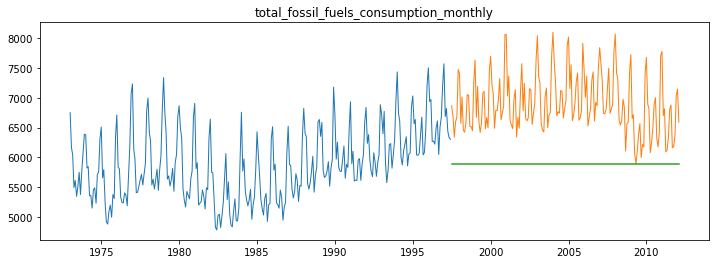

fossil_fuels_difference -- RMSE: 1131


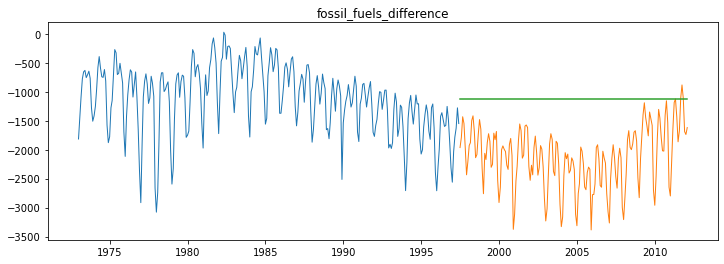

In [58]:
for col in train.columns:
    plot_and_eval(col)

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [59]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                            target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,total_fossil_fuels_production_monthly,201.0
1,last_observed_value,total_fossil_fuels_consumption_monthly,774.0
2,last_observed_value,fossil_fuels_difference,776.0
3,simple_average,total_fossil_fuels_production_monthly,200.0
4,simple_average,total_fossil_fuels_consumption_monthly,1134.0
5,simple_average,fossil_fuels_difference,1131.0


### Moving Average

In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value. 

In [60]:
# demonstrate that the mean of the first 30 days 
# is equal to rolling(30) on day 30

print(train['total_fossil_fuels_production_monthly'].rolling(4).mean())

date
1973-01-01           NaN
1973-02-01           NaN
1973-03-01           NaN
1973-04-01    4831.34675
1973-05-01    4837.43750
                 ...    
1997-02-01    4836.82175
1997-03-01    4894.91725
1997-04-01    4875.98175
1997-05-01    4888.51250
1997-06-01    4913.93775
Name: total_fossil_fuels_production_monthly, Length: 294, dtype: float64


In [61]:
# make a prediction
period=4
train['total_fossil_fuels_production_monthly'].rolling(period).mean()[-1]

4913.93775

In [62]:
period = 4

# take 4 month (quarterly) rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
production = round(train['total_fossil_fuels_production_monthly'].rolling(period).mean()[-1], 2)
consumption = round(train['total_fossil_fuels_consumption_monthly'].rolling(period).mean()[-1], 2)
difference = round(train['fossil_fuels_difference'].rolling(period).mean()[-1], 2)
print(production, consumption, difference)

4913.94 6473.49 -1559.55


In [63]:
yhat_df = make_predictions(production, consumption, difference)
yhat_df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1997-07-01,4913.94,6473.49,-1559.55
1997-08-01,4913.94,6473.49,-1559.55
1997-09-01,4913.94,6473.49,-1559.55
1997-10-01,4913.94,6473.49,-1559.55
1997-11-01,4913.94,6473.49,-1559.55


**Plot Actual vs. Predicted Values**

Now, let's plot and evaluate the performance of our time series model using **Moving Average**

total_fossil_fuels_production_monthly -- RMSE: 240


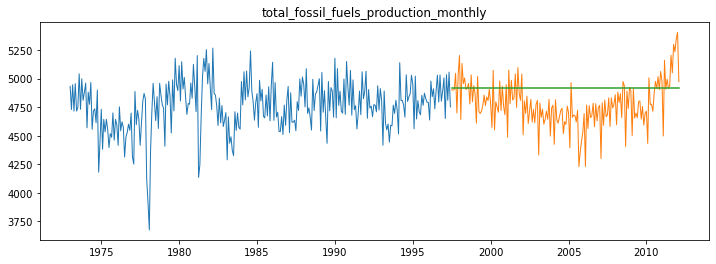

total_fossil_fuels_consumption_monthly -- RMSE: 650


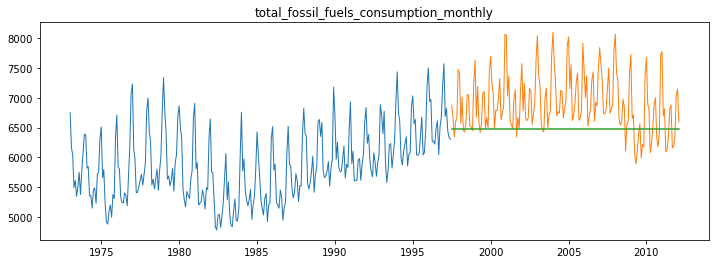

fossil_fuels_difference -- RMSE: 768


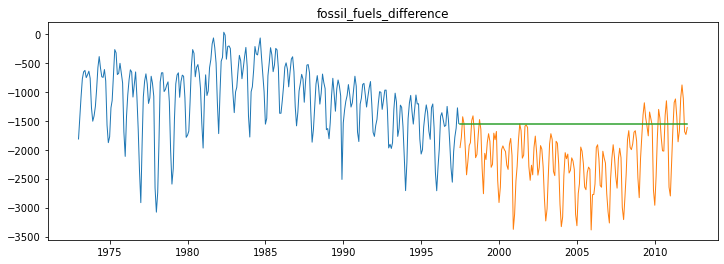

In [64]:
for col in train.columns:
    plot_and_eval(col)

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [65]:
for col in train.columns:
    eval_df = append_eval_df(model_type = '4_month_moving_average', 
                            target_var = col)

eval_df

,model_type,target_var,rmse
0,last_observed_value,total_fossil_fuels_production_monthly,201.0
1,last_observed_value,total_fossil_fuels_consumption_monthly,774.0
2,last_observed_value,fossil_fuels_difference,776.0
3,simple_average,total_fossil_fuels_production_monthly,200.0
4,simple_average,total_fossil_fuels_consumption_monthly,1134.0
5,simple_average,fossil_fuels_difference,1131.0
6,4_month_moving_average,total_fossil_fuels_production_monthly,240.0
7,4_month_moving_average,total_fossil_fuels_consumption_monthly,650.0
8,4_month_moving_average,fossil_fuels_difference,768.0


Let's try out several other values for periods:

In [66]:
periods = [4, 12, 24, 60]

for p in periods: 
    production = round(train['total_fossil_fuels_production_monthly'].rolling(p).mean()[-1], 2)
    consumption = round(train['total_fossil_fuels_consumption_monthly'].rolling(p).mean()[-1], 2)
    difference = round(train['fossil_fuels_difference'].rolling(p).mean()[-1], 2)
    yhat_df = make_predictions(production, consumption, difference)
    model_type = str(p) + '_mmonth_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)

In [67]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,total_fossil_fuels_production_monthly,201.0
1,last_observed_value,total_fossil_fuels_consumption_monthly,774.0
2,last_observed_value,fossil_fuels_difference,776.0
3,simple_average,total_fossil_fuels_production_monthly,200.0
4,simple_average,total_fossil_fuels_consumption_monthly,1134.0
5,simple_average,fossil_fuels_difference,1131.0
6,4_month_moving_average,total_fossil_fuels_production_monthly,240.0
7,4_month_moving_average,total_fossil_fuels_consumption_monthly,650.0
8,4_month_moving_average,fossil_fuels_difference,768.0
9,4_mmonth_moving_avg,total_fossil_fuels_production_monthly,240.0


Which is best so far? 

In [68]:
min_items_rmse = eval_df[eval_df.target_var == 'total_fossil_fuels_production_monthly']['rmse'].min()

In [69]:
min_items_rmse

200.0

In [70]:
eval_df[eval_df.rmse == min_items_rmse]

,model_type,target_var,rmse
3,simple_average,total_fossil_fuels_production_monthly,200.0
18,60_mmonth_moving_avg,total_fossil_fuels_production_monthly,200.0


In [71]:
min_dollars_rmse = eval_df[eval_df.target_var == 'total_fossil_fuels_consumption_monthly']['rmse'].min()

eval_df[eval_df.rmse == min_dollars_rmse]

,model_type,target_var,rmse
13,12_mmonth_moving_avg,total_fossil_fuels_consumption_monthly,553.0


In [72]:
min_dollars_rmse = eval_df[eval_df.target_var == 'fossil_fuels_difference']['rmse'].min()

eval_df[eval_df.rmse == min_dollars_rmse]

,model_type,target_var,rmse
17,24_mmonth_moving_avg,fossil_fuels_difference,636.0


### Holt's Linear Trend


Exponential smoothing applied to both the average and the trend (slope).  

- $\alpha$ / smoothing_level: smoothing parameter for mean. Values closer to 1 will have less of a smoothing effect and will give greater weight to recent values.   
- $\beta$ / smoothing_slope: smoothing parameter for the slope. Values closer to 1 will give greater weight to recent slope/values. 



**Seasonal Decomposition**


First, let's take a look at the seasonal decomposition for each target. 

In [73]:
import statsmodels.api as sm

fossil_fuels_difference 



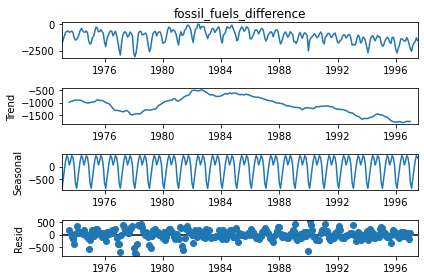

In [74]:
print(col, '\n')
sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()
plt.show()

total_fossil_fuels_production_monthly 

total_fossil_fuels_consumption_monthly 

fossil_fuels_difference 



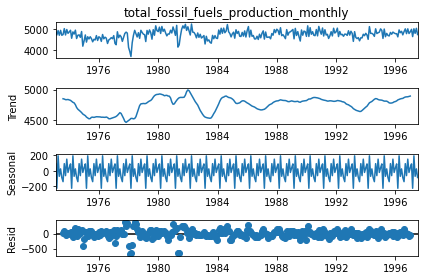

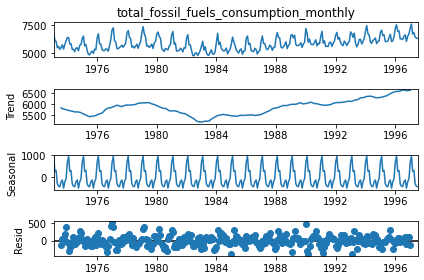

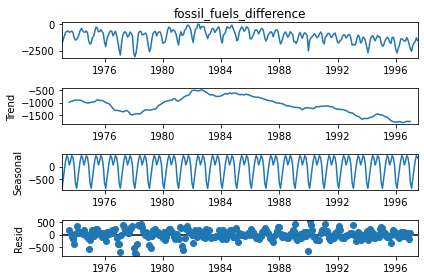

In [75]:
for col in train.columns:
    print(col,'\n')
    sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()

#### Basic Holt's Linear Trend

**Make Predictions**

Now, like we would when using sklearn, we will create the Holt object, fit the model, and make predictions. 

Holt: 

- exponential = True/False (exponential vs. linear growth, additive vs. multiplicative)
- damped $\phi$ = True/False: with Holt, forecasts will increase or decrease indefinitely into the future.  To avoid this, use the Damped trend method which has a damping parameter 0< ϕ <1. 


fit: 

- smoothing_level ($\alpha$): value between (0,1)
- smoothing_slope ($\beta$): value between (0,1)
- optimized: use the auto-optimization that allow statsmodels to automatically find an optimized value for us. 

In [76]:
train.columns

Index(['total_fossil_fuels_production_monthly',
       'total_fossil_fuels_consumption_monthly', 'fossil_fuels_difference'],
      dtype='object')

In [77]:
col = 'total_fossil_fuels_production_monthly' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [78]:
# fit the holt's object
model = model.fit(optimized=True)

In [79]:
yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])

In [80]:
validate.shape

(176, 3)

In [81]:
yhat_items

1997-07-01    4874.188771
1997-08-01    4873.935874
1997-09-01    4873.686359
1997-10-01    4873.440180
1997-11-01    4873.197294
                 ...     
2011-10-01    4857.169667
2011-11-01    4857.144369
2011-12-01    4857.119409
2012-01-01    4857.094782
2012-02-01    4857.070485
Freq: MS, Length: 176, dtype: float64

In [82]:
# doing this in a loop for each column
for col in train.columns:
    model = Holt(train[col], exponential=False, damped=True)
    model = model.fit(optimized=True)
    yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to conve

In [83]:
yhat_df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1997-07-01,4874.19,6290.66,-1546.18
1997-08-01,4873.94,6279.35,-1544.85
1997-09-01,4873.69,6268.15,-1543.54
1997-10-01,4873.44,6257.07,-1542.24
1997-11-01,4873.20,6246.10,-1540.96
...,...,...,...
2011-10-01,4857.17,5362.60,-1437.36
2011-11-01,4857.14,5360.58,-1437.12
2011-12-01,4857.12,5358.57,-1436.88


In [84]:
col = 'total_fossil_fuels_production_monthly'
# create the Holt object 
model = Holt(train[col], exponential=False, damped=True)
# fit the model 
model = model.fit(optimized=True)
# make predictions for each date in validate 
yhat_items = model.predict(start = validate.index[0],
                           end = validate.index[-1])
# add predictions to yhat_df
yhat_df[col] = round(yhat_items, 2)

/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [85]:
yhat_df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1997-07-01,4874.19,6290.66,-1546.18
1997-08-01,4873.94,6279.35,-1544.85
1997-09-01,4873.69,6268.15,-1543.54
1997-10-01,4873.44,6257.07,-1542.24
1997-11-01,4873.20,6246.10,-1540.96
...,...,...,...
2011-10-01,4857.17,5362.60,-1437.36
2011-11-01,4857.14,5360.58,-1437.12
2011-12-01,4857.12,5358.57,-1436.88


In [86]:
validate

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1997-07-01,4901.194,6864.248,-1963.054
1997-08-01,4899.501,6688.172,-1788.671
1997-09-01,4906.809,6338.503,-1431.694
1997-10-01,5046.643,6594.252,-1547.609
1997-11-01,4699.572,6676.918,-1977.346
...,...,...,...
2011-10-01,5299.419,6182.237,-882.818
2011-11-01,5235.448,6355.753,-1120.305
2011-12-01,5347.022,7034.714,-1687.692


In [87]:
yhat_items

1997-07-01    4874.188771
1997-08-01    4873.935874
1997-09-01    4873.686359
1997-10-01    4873.440180
1997-11-01    4873.197294
                 ...     
2011-10-01    4857.169667
2011-11-01    4857.144369
2011-12-01    4857.119409
2012-01-01    4857.094782
2012-02-01    4857.070485
Freq: MS, Length: 176, dtype: float64

**Plot Actual vs. Predicted Values**

total_fossil_fuels_production_monthly -- RMSE: 215


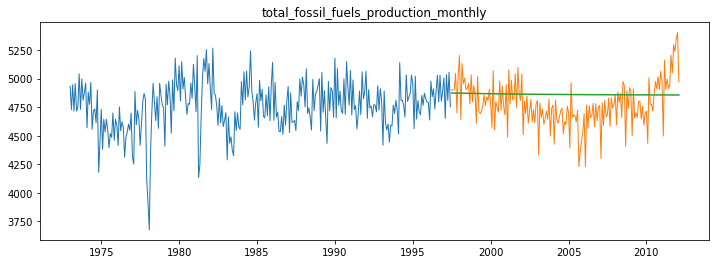

total_fossil_fuels_consumption_monthly -- RMSE: 1327


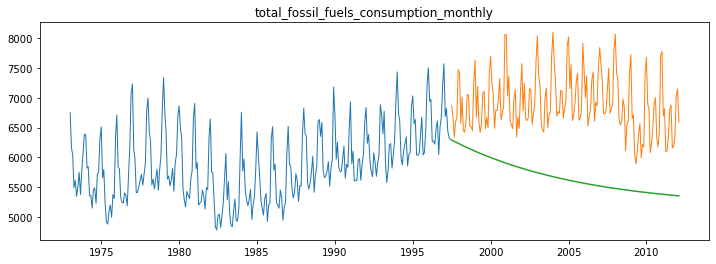

fossil_fuels_difference -- RMSE: 832


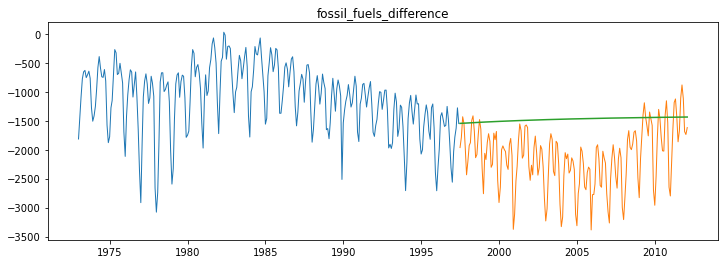

In [88]:
for col in train.columns:
    plot_and_eval(target_var = col)

Evaluate

In [89]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = col)

In [90]:
eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
3,simple_average,total_fossil_fuels_production_monthly,200.0
18,60_mmonth_moving_avg,total_fossil_fuels_production_monthly,200.0
0,last_observed_value,total_fossil_fuels_production_monthly,201.0
15,24_mmonth_moving_avg,total_fossil_fuels_production_monthly,212.0
21,holts_optimized,total_fossil_fuels_production_monthly,215.0
12,12_mmonth_moving_avg,total_fossil_fuels_production_monthly,231.0
6,4_month_moving_average,total_fossil_fuels_production_monthly,240.0
9,4_mmonth_moving_avg,total_fossil_fuels_production_monthly,240.0
13,12_mmonth_moving_avg,total_fossil_fuels_consumption_monthly,553.0
16,24_mmonth_moving_avg,total_fossil_fuels_consumption_monthly,568.0


total_fossil_fuels_production_monthly -- RMSE: 480


/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


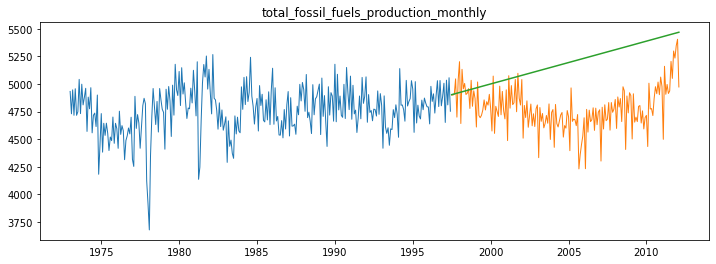

total_fossil_fuels_consumption_monthly -- RMSE: 508


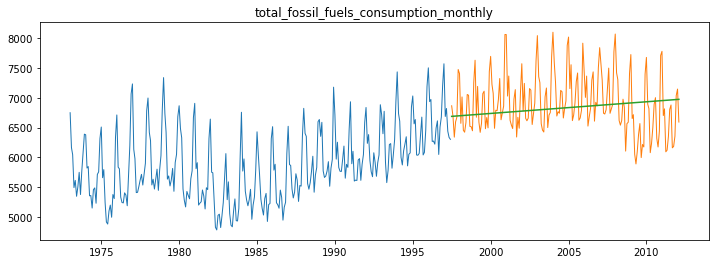

fossil_fuels_difference -- RMSE: 706


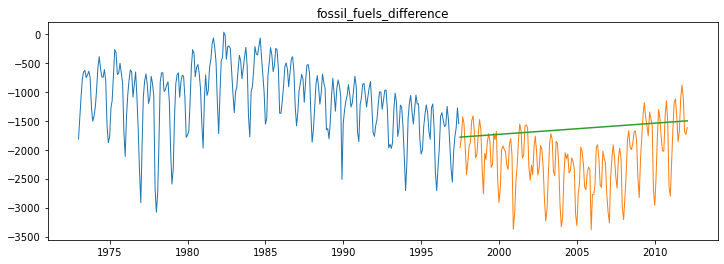

In [91]:
for col in train.columns:
    model = Holt(train[col], exponential=False)
    model = model.fit(smoothing_level=0.15, smoothing_slope=0.12, optimized=False)
    yhat_items = model.predict(start = validate.index[0], end= validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

for col in train.columns:
    plot_and_eval(target_var = col)

In [92]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_.15/.12', 
                            target_var = col)
eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
3,simple_average,total_fossil_fuels_production_monthly,200.0
18,60_mmonth_moving_avg,total_fossil_fuels_production_monthly,200.0
0,last_observed_value,total_fossil_fuels_production_monthly,201.0
15,24_mmonth_moving_avg,total_fossil_fuels_production_monthly,212.0
21,holts_optimized,total_fossil_fuels_production_monthly,215.0
12,12_mmonth_moving_avg,total_fossil_fuels_production_monthly,231.0
6,4_month_moving_average,total_fossil_fuels_production_monthly,240.0
9,4_mmonth_moving_avg,total_fossil_fuels_production_monthly,240.0
24,holts_.15/.12,total_fossil_fuels_production_monthly,480.0
25,holts_.15/.12,total_fossil_fuels_consumption_monthly,508.0


Take all the 2016 data points, compute the daily delta, year-over-year, average that delta over all the days, and adding that average to the previous year's value on a day will give you the forecast for that day. 

If a primary cycle is weekly, then you may want to do this on a week-over-week cadence. 

In the below example:  
1. Compute the 365 average year over year differences from 2013 through 2015
2. Add that average delta to the values during 2015. 
3. Set the index in your yhat dataframe to represent the dates those predictions are make for. 

Let's get started....

**Re-split data**

In [93]:
train = df_fossil_fuels['1989':'1999']
validate = df_fossil_fuels['2000':'2010']
test = df_fossil_fuels['2011':]

print(train.shape)
print(validate.shape)
print(test.shape)

train.head()
train.tail()

(132, 3)
(132, 3)
(132, 3)


,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1999-08-01,4856.081,7108.281,-2252.200
1999-09-01,4764.465,6479.405,-1714.940
1999-10-01,4839.475,6666.627,-1827.152
1999-11-01,4808.766,6494.068,-1685.302
1999-12-01,4906.244,7438.380,-2532.136


In [94]:
# finding the year-over-year difference for each day from 2013 to 2015
# taking the mean, and then adding that value to the daily 2015 values. 

# find yoy diff. from 2013-2014 and 2014-2015, take the mean, and add to each value in 2015. 
yhat_df = train['1989':'1999'] + train.diff(120).mean()

In [95]:
train.diff(120).mean()

total_fossil_fuels_production_monthly       9.340833
total_fossil_fuels_consumption_monthly    788.042167
fossil_fuels_difference                  -778.701333
dtype: float64

In [96]:
train.loc['1989':'1999'].head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1989-01-01,4999.261,6634.584,-1635.323
1989-02-01,4541.252,6352.085,-1810.833
1989-03-01,5054.078,6586.898,-1532.820
1989-04-01,4706.294,5772.522,-1066.228
1989-05-01,4894.828,5662.890,-768.062


In [97]:
yhat_df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1989-01-01,5008.601833,7422.626167,-2414.024333
1989-02-01,4550.592833,7140.127167,-2589.534333
1989-03-01,5063.418833,7374.940167,-2311.521333
1989-04-01,4715.634833,6560.564167,-1844.929333
1989-05-01,4904.168833,6450.932167,-1546.763333


In [98]:
# let's peek into the prediction we will make for 1/1/2020
# by comparing the predicted value 
# (2015 value + year-over-year average difference)
# to the actual 1/1/2020 value
pd.concat([yhat_df.head(1), validate.head(1)])

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1989-01-01,5008.601833,7422.626167,-2414.024333
2000-01-01,4780.147000,7692.062000,-2911.915000


In [99]:
# set yhat_df to index of validate
yhat_df.index = validate.index

In [100]:
yhat_df.describe()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
count,132.000000,132.000000,132.000000
mean,4832.561182,7169.739515,-2337.178333
std,163.366176,506.681670,472.486473
min,4426.718833,6303.470167,-3538.523333
25%,4717.606583,6750.522417,-2653.404583
50%,4817.747333,7144.955667,-2313.386833
75%,4939.355583,7466.989917,-1985.615833
max,5212.009833,8415.205167,-1510.900333


In [101]:
yhat_df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2000-01-01,5008.601833,7422.626167,-2414.024333
2000-02-01,4550.592833,7140.127167,-2589.534333
2000-03-01,5063.418833,7374.940167,-2311.521333
2000-04-01,4715.634833,6560.564167,-1844.929333
2000-05-01,4904.168833,6450.932167,-1546.763333


In [102]:
yhat_df.shape

(132, 3)

total_fossil_fuels_production_monthly -- RMSE: 183


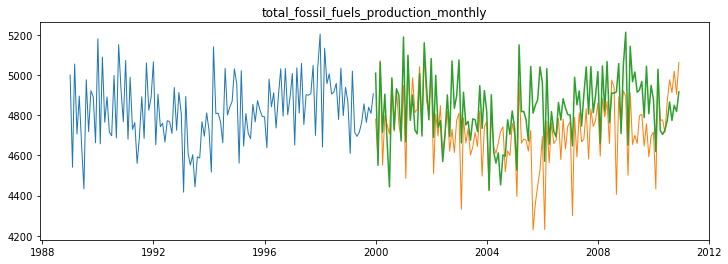

total_fossil_fuels_consumption_monthly -- RMSE: 532


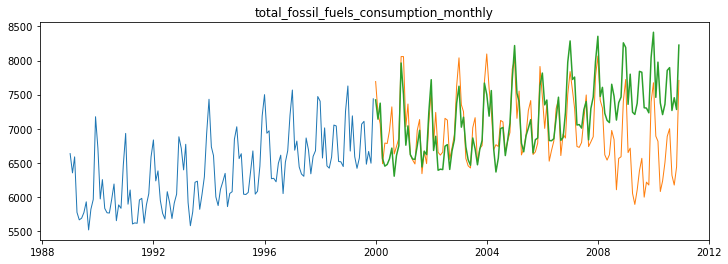

fossil_fuels_difference -- RMSE: 511


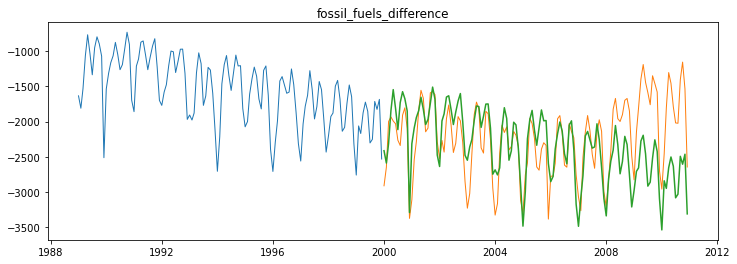

In [103]:
for col in train.columns:
    plot_and_eval(target_var = col)
    eval_df = append_eval_df(model_type = "previous_year", 
                            target_var = col)

## Conclusion

Which model did the best? 

In [169]:
production_min_rmse = eval_df.groupby('target_var')['rmse'].min()[0]

consumption_min_rmse = eval_df.groupby('target_var')['rmse'].min()[1]

difference_min_rmse = eval_df.groupby('target_var')['rmse'].min()[2]

# find which model that is
eval_df[((eval_df.rmse == production_min_rmse) | 
         (eval_df.rmse == consumption_min_rmse) |
         (eval_df.rmse == difference_min_rmse))]

,model_type,target_var,rmse
25,holts_.15/.12,total_fossil_fuels_consumption_monthly,508.0
27,previous_year,total_fossil_fuels_production_monthly,183.0
29,previous_year,fossil_fuels_difference,511.0


Let's test it out on our out-of-sample data

We will be using train + validate to predict test. 

In [170]:
yhat_df = validate + train.diff(120).mean()
yhat_df.index = test.index

In [171]:
yhat_df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2011-01-01,4789.487833,8480.104167,-3690.616333
2011-02-01,4582.888833,8010.467167,-3427.578333
2011-03-01,5081.193833,7859.507167,-2778.313333
2011-04-01,4561.220833,7274.463167,-2713.242333
2011-05-01,4806.688833,7577.703167,-2771.014333
...,...,...,...
2021-08-01,4984.978833,7787.987167,-2803.008333
2021-09-01,4921.635833,7105.669167,-2184.033333
2021-10-01,5027.067833,6961.887167,-1934.819333


In [172]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], label='train')
    plt.plot(validate[target_var], label='validate')
    plt.plot(test[target_var], label='test')
    plt.plot(yhat_df[target_var], alpha=.5)
    plt.title(target_var)
    plt.show()

In [173]:
rmse_production = sqrt(mean_squared_error(test['total_fossil_fuels_production_monthly'], 
                                       yhat_df['total_fossil_fuels_production_monthly']))

rmse_consumption = sqrt(mean_squared_error(test['total_fossil_fuels_consumption_monthly'], 
                                       yhat_df['total_fossil_fuels_consumption_monthly']))


rmse_difference = sqrt(mean_squared_error(test['fossil_fuels_difference'], 
                                       yhat_df['fossil_fuels_difference']))

In [174]:
print('rmse-production: ', rmse_production)
print('rmse-consumption: ', rmse_consumption)
print('rmse-difference: ', rmse_difference)

rmse-production:  1243.1527425131706
rmse-consumption:  1236.6455363208331
rmse-difference:  2378.9152073744804


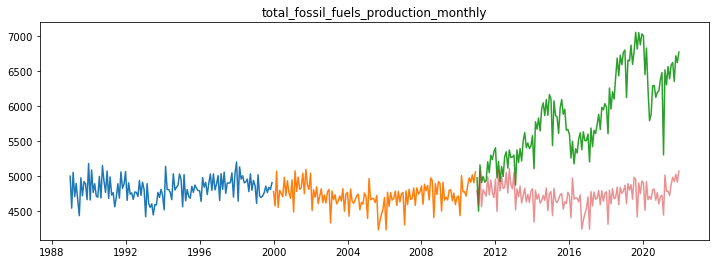

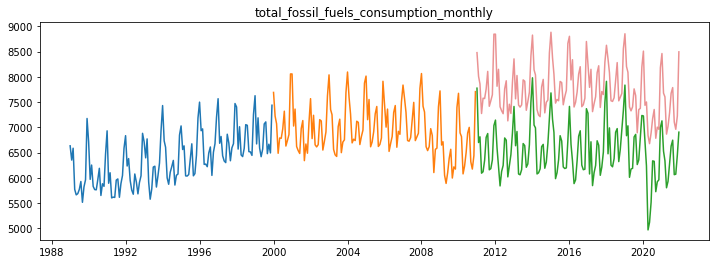

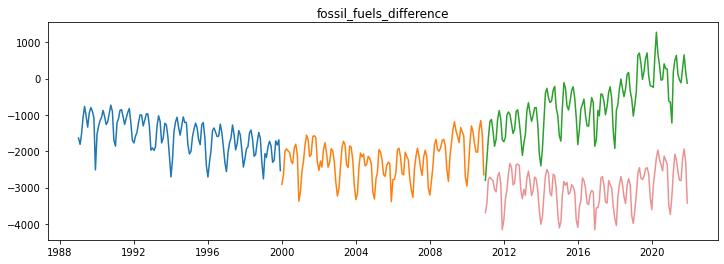

In [175]:
for col in train.columns:
    final_plot(col)

In [176]:
# to predict 2022

yhat_df = test + train.diff(120).mean()

yhat_df.index = test.index + pd.Timedelta('10Y')

In [177]:
yhat_df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2020-12-31 10:12:00,4987.119833,8564.367167,-3577.247333
2021-01-31 10:12:00,4507.488833,7487.831167,-2980.342333
2021-02-28 10:12:00,5170.102833,7600.925167,-2430.822333
2021-03-31 10:12:00,4916.282833,6880.545167,-1964.262333
2021-04-30 10:12:00,5005.362833,6908.683167,-1903.320333


In [178]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], label='train')
    plt.plot(validate[target_var], label='validate')
    plt.plot(test[target_var], label='test')
    plt.plot(yhat_df[target_var], alpha=.5)
    plt.title(target_var)
    plt.show()

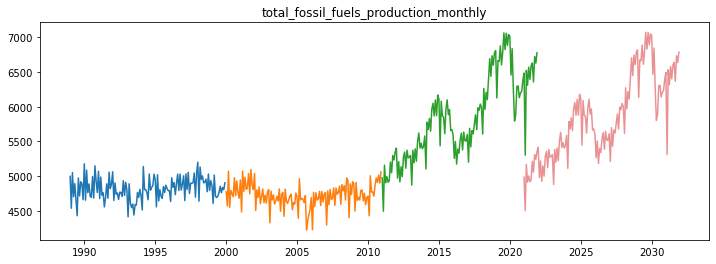

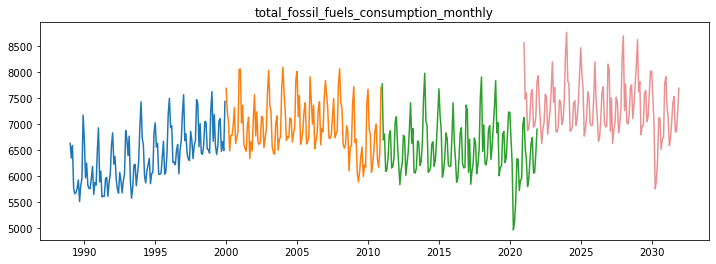

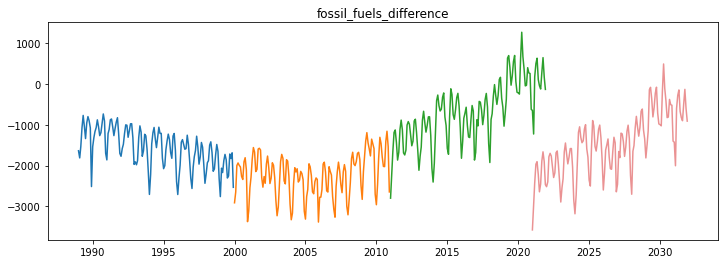

In [179]:
for col in train.columns:
    final_plot(col)